In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [3]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [6]:
print(df.columns)


Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')


In [8]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')


In [10]:
print(df.columns.tolist())


['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score']


In [11]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical features
data = df[['Age', 'Annual Income', 'Spending Score']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Preview scaled data
print(scaled_data[:5])



[[-1.14551615  0.79881267  1.33705873]
 [ 0.18033514  1.44207552  1.54592857]
 [ 0.36974247 -0.74320756  0.88450743]
 [-1.47697897 -1.03895267  0.2230863 ]
 [-1.42962714  0.84231698  0.88450743]]


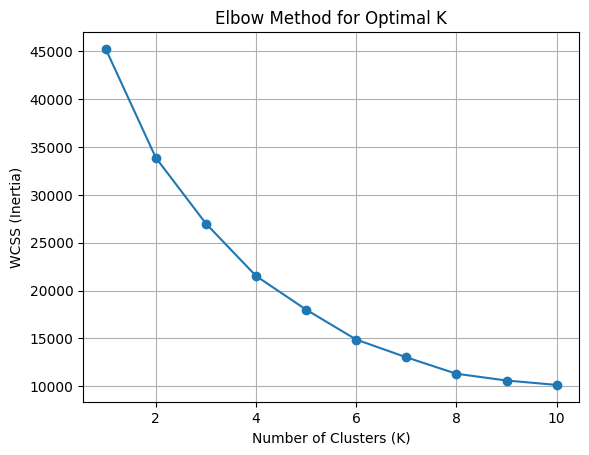

In [12]:
wcss = []  # Within-Cluster Sum of Squares

# Try K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()


In [13]:
# Fit KMeans with optimal K (assume K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# View first few rows
df.head()


,Customer ID,Age,Gender,Annual Income,Spending Score,Cluster
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,2
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,4
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,1
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,0
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,2


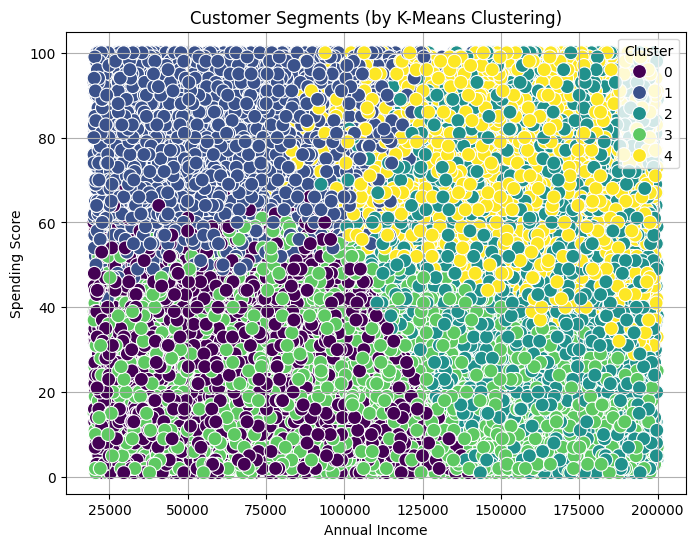

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments (by K-Means Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.26689623156850506
